In [1]:
import os
import torch
import numpy as np
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

from PIL import Image, ImageDraw
from torch.nn import functional as F
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import  FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

In [2]:


def model():
    # load the COCO pre-trained model
    # we will keep the image size to 1024 pixels instead of the original 800,
    # this will ensure better training and testing results, although it may...
    # ... increase the training time (a tarde-off)
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, 
                                                                 min_size=1024)
    # one class is pneumonia, and the other is background
    num_classes = 2
    # get the input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace pre-trained head with our features head
    # the head layer will classify the images based on our data input features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [3]:
DEVICE = "cpu"
MODEL = model()
MODEL.load_state_dict(torch.load("fasterrcnn_resnet50_fpn.pth", map_location=torch.device(DEVICE)))
MODEL.to(DEVICE)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(1024,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample

In [4]:
#image_location = '/home/yihsin/Documents/Pneumonia/EfficientDet/datasets/EfficientDet_pneumonia_PA/val/0ab261f9-4eb5-42ab-a9a5-e918904d6356.png'

In [28]:
image_location = '../data/size1024/stage_2_train_images/c44a8316-9b90-49e6-ab36-8db213312a4e.png'

In [ ]:
c44a8316-9b90-49e6-ab36-8db213312a4e

In [29]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

orig_image = Image.open(image_location)
orig_image = orig_image.convert('RGB')
image = orig_image.copy()
image = transform(image).to(DEVICE)
image = torch.unsqueeze(image, 0)

MODEL.eval()
outputs = MODEL(image)

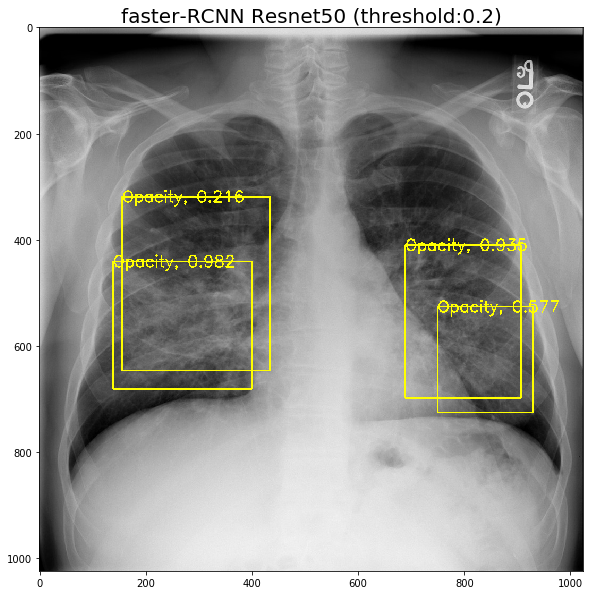

In [30]:
out = outputs
array_image = np.array(orig_image)
obj_list = [' ','Opacity']
threshold = 0.2
#if len(out[0]['boxes']) == 0:
    #break
#ori_imgs[i] = ori_imgs[i].copy()
for j in range(len(out[0]['boxes'])):
    if float(out[0]['scores'][j])<threshold:
        continue
    (x1, y1, x2, y2) = out[0]['boxes'][j].detach().numpy().astype(np.int)
    cv2.rectangle(array_image, (x1, y1), (x2, y2), (255, 255, 0), 2)
    obj = obj_list[out[0]['labels'][j]]
    score = float(out[0]['scores'][j])

    cv2.putText(array_image, '{}, {:.3f}'.format(obj, score),
                (x1, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 1,
                (255, 255, 0), 2)
plt.figure(figsize=(20,10))
plt.title('faster-RCNN Resnet50 (threshold:0.2)',fontsize=20)
plt.imshow(array_image)

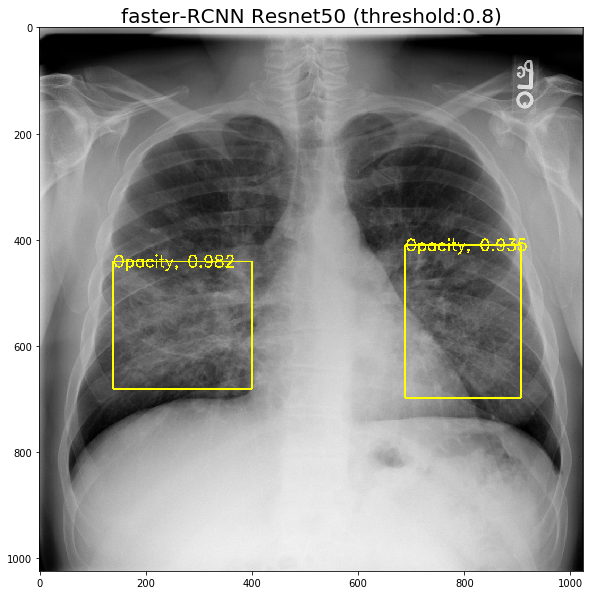

In [31]:
out = outputs
array_image = np.array(orig_image)
obj_list = [' ','Opacity']
threshold = 0.8
#if len(out[0]['boxes']) == 0:
    #break
#ori_imgs[i] = ori_imgs[i].copy()
for j in range(len(out[0]['boxes'])):
    if float(out[0]['scores'][j])<threshold:
        continue
    (x1, y1, x2, y2) = out[0]['boxes'][j].detach().numpy().astype(np.int)
    cv2.rectangle(array_image, (x1, y1), (x2, y2), (255, 255, 0), 2)
    obj = obj_list[out[0]['labels'][j]]
    score = float(out[0]['scores'][j])

    cv2.putText(array_image, '{}, {:.3f}'.format(obj, score),
                (x1, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 1,
                (255, 255, 0), 2)
plt.figure(figsize=(20,10))
plt.title('faster-RCNN Resnet50 (threshold:0.8)',fontsize=20)
plt.imshow(array_image)